In [1]:
import os
import tensorflow as tf
import numpy as np
from model.input_fn import _parse_function

2022-12-11 20:50:46.204383: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 20:50:48.500576: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-11 20:50:48.500889: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-11 20:50:48.500906: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:

interpreter = tf.lite.Interpreter("./NewTrained2.tflite")
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [3]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [4]:
arr = np.zeros((1,224,224,3),dtype=np.float32)

In [17]:
# Evaluate TFLite Model
from IPython.display import Image, display

correct = 0
incorrect = 0
files = os.listdir("../data/224x224_currency/train_dir/")
i = 0
dic = {
    "10": 0,
    "20": 1,
    "50": 2,
    "100": 3,
    "200": 4,
    "500": 5,
    "2000": 6
}
# print(type(dict))
y_test = []
y_pred = []
print("Validation Accuracy: ")
for file in files:
    i += 1
    # if i == 100:
        # break
    x = _parse_function("../data/224x224_currency/train_dir/"+file,1,224)
    arr[0] = x[0]
    interpreter.set_tensor(input_details[0]['index'], arr)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    results = np.squeeze(output_data)
    top_k = results.argsort()[-1:][::-1]
    ans = file.split("_")[0]
    # print(ans,": ",top_k[0])
    if dic[ans] != top_k[0]:
        incorrect += 1
        # display(Image(filename="../data/224x224_currency/dev_dir/"+file))
        # print(top_k[0])
        
    else: 
        correct += 1
    val = dic.get(ans)
    y_test.append(val)
    y_pred.append(top_k[0])
    

print((correct/(incorrect+correct))*100) 

Validation Accuracy: 
92.71523178807946


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)
cm_df = pd.DataFrame(cm,
                     index = ['10','20','50','100','200','500','2000'], 
                     columns = ['10','20','50','100','200','500','2000'])

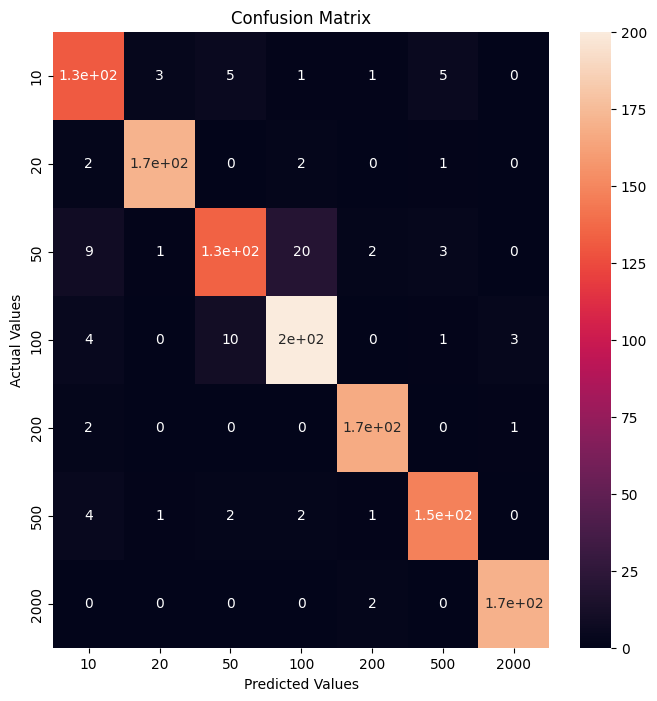

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
Image(filename='../data/224x224_currency/dev_dir/100_IMG20220901124108.jpg') 

In [ ]:
file1 = open("/home/arvind/Desktop/BTP/CurrencyDetectionForVisuallyImpaired/experiments/traindata.txt", "a")  # append mode
file1.write("hey")
file1.close()

In [1]:
#test full model
from IPython.display import Image, display
from model.cnn import CNN
from model.utils import Params
import tensorflow as tf
import numpy as np

from model.input_fn import _parse_function

arr = np.zeros((1,224,224,3),dtype=np.float32)
params = Params("./model/params.json")
ckpt = "./experiments/saved_weights/"
model = CNN(num_classes=params.num_labels, checkpoint_directory=ckpt, params=params)
# model.build((1,224,224,3))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(learning_rate=params.learning_rate),)
model.load_weights("./experiments/saved_weights/weight")
# model.load_weights("./experiments/checkpoints/cpkt-15")
# checkpoint = tf.train.Checkpoint(model=model)
# checkpoint.restore("./experiments/saved_weights/weight").expect_partial()
# params = Params("./model/params.json")
# ckpt = "./experiments/saved_weights/"
# model2 = CNN(num_classes=params.num_labels, checkpoint_directory=ckpt, params=params)
# model2.build((1,224,224,3))
# model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(learning_rate=params.learning_rate),)
# model2.load_weights("./NewTrained/saved_model.pb")
correct = 0
incorrect = 0
files = os.listdir("../data/224x224_currency/dev_dir/")
i = 0

dic = {
    10: 0,
    20: 1,
    50: 2,
    100: 3,
    200: 4,
    500: 5,
    2000: 6
}
print("Validation Accuracy: ")
for file in files:
    i += 1
    # if i == 100:
        # break
    x = _parse_function("../data/224x224_currency/dev_dir/"+file,1,224)
    arr[0] = x[0]
    # interpreter.set_tensor(input_details[0]['index'], arr)
    # interpreter.invoke()
    output_data = model.call(arr,training=True)
    results = np.squeeze(output_data)
    top_k = results.argsort()[-1:][::-1]
    ans = file.split("_")[0]
    # print(ans,": ",top_k[0])
    if dic[int(ans)] != top_k[0]:
        incorrect += 1
        # display(Image(filename="../data/224x224_currency/dev_dir/"+file))
        # print(top_k[0])
        
    else: 
        correct += 1

print((correct/(incorrect+correct))*100) 

2022-12-11 14:18:52.626827: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 14:18:55.390781: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-11 14:18:55.390892: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-11 14:18:55.390901: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Validation Accuracy: 


2022-12-11 14:19:02.804937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8600


92.12924606462303


In [ ]:


x1 = np.array([6])
model.fit(arr,x1)
model.save("./NewTrained")

In [ ]:
params = Params("./model/params.json")
ckpt = "./experiments/saved_weights/"
model2 = CNN(num_classes=params.num_labels, checkpoint_directory=ckpt, params=params)
# model2.build((1,224,224,3))
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(learning_rate=params.learning_rate),)

In [9]:
from IPython.display import Image, display
from model.cnn import CNN
from model.utils import Params
import tensorflow as tf
import numpy as np

from model.input_fn import _parse_function

arr = np.zeros((1,224,224,3),dtype=np.float32)
params = Params("./model/params.json")
ckpt = "./experiments/saved_weights/"
model = CNN(num_classes=params.num_labels, checkpoint_directory=ckpt, params=params)
# model.build((1,224,224,3))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(learning_rate=params.learning_rate),)
# checkpoint = tf.train.Checkpoint(model=model)
# checkpoint.restore("./WModel/")
model.load_weights("./experiments/saved_weights/weight")

x1 = np.array([6])
model.fit(arr,x1)
model.save("./WModel")

2022-12-11 14:02:08.327251: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape incnn_8/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2022-12-11 14:02:08.810526: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f24def64e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-11 14:02:08.810556: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2022-12-11 14:02:08.828008: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-12-11 14:02:09.054412: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 6s 6s/step - loss: 0.1307


INFO:tensorflow:Assets written to: ./WModel/assets


INFO:tensorflow:Assets written to: ./WModel/assets


AssertionError: Found 19 Python objects that were not bound to checkpointed values, likely due to changes in the Python program. Showing 10 of 19 unmatched objects: [<tf.Variable 'conv2d_2/kernel:0' shape=(5, 5, 32, 32) dtype=float32, numpy=
array([[[[ 3.42741348e-02,  1.58269331e-03,  4.57650684e-02, ...,
          -4.08978313e-02,  5.10643907e-02,  3.30490880e-02],
         [ 3.06345150e-03,  3.20005082e-02, -8.52223486e-04, ...,
           3.48076113e-02, -3.65089998e-02,  2.46880576e-03],
         [-2.78200582e-02, -5.80330901e-02,  4.07870747e-02, ...,
          -5.37488237e-02, -2.00457722e-02, -5.25434688e-02],
         ...,
         [-3.16863693e-02,  4.76389341e-02, -5.03681861e-02, ...,
          -1.05195306e-02,  4.58609052e-02,  2.39325054e-02],
         [ 4.78652157e-02,  3.39759253e-02,  4.68852185e-02, ...,
          -4.80627418e-02,  4.10052575e-02, -1.39253102e-02],
         [ 2.49625556e-02, -3.94903719e-02,  3.92071269e-02, ...,
           5.98937236e-02,  3.86767946e-02,  9.81716439e-03]],

        [[ 4.35463898e-02,  1.55349448e-03, -1.64955668e-02, ...,
           5.77914603e-02,  4.93559875e-02, -1.38913766e-02],
         [ 4.90729697e-02,  7.46608153e-03, -5.63051701e-02, ...,
           4.06518765e-02, -4.92055938e-02,  1.00669824e-02],
         [ 3.12234871e-02,  3.46512720e-03,  4.93973829e-02, ...,
           2.79250033e-02, -2.47354396e-02, -5.65981194e-02],
         ...,
         [ 6.31931797e-03,  5.62792830e-02, -2.03704834e-03, ...,
          -1.02559403e-02,  2.73371153e-02,  1.47219487e-02],
         [-3.08413450e-02, -2.40103118e-02,  5.04751876e-03, ...,
          -1.96655840e-02,  9.43404064e-03,  2.39256136e-02],
         [-5.89711033e-02, -5.34887798e-02, -2.23368928e-02, ...,
          -1.45044066e-02, -1.48607232e-02,  5.08443825e-02]],

        [[ 3.75436954e-02,  4.50840034e-02, -4.48001921e-02, ...,
           4.04413603e-02, -2.01028585e-03, -4.08978015e-02],
         [ 6.01951443e-02,  5.51288389e-02,  1.62815638e-02, ...,
          -1.38015747e-02,  6.01509921e-02, -2.96268091e-02],
         [-3.49622965e-02,  4.43839841e-02, -4.14000191e-02, ...,
           2.12644413e-03,  3.74819525e-02, -1.59893818e-02],
         ...,
         [ 4.20596786e-02, -7.31504336e-03,  3.61033492e-02, ...,
           9.22200456e-03,  3.65581028e-02,  4.36783955e-03],
         [-3.94393280e-02, -3.59693803e-02,  5.52936159e-02, ...,
           4.82638739e-02, -2.75836699e-02,  2.57482044e-02],
         [-3.38995084e-02,  2.91803814e-02,  5.87611087e-02, ...,
          -3.56329232e-02, -1.81598030e-02,  5.08246981e-02]],

        [[ 4.63395081e-02, -6.00769743e-02, -3.50122564e-02, ...,
          -2.49021128e-02, -4.52460796e-02, -5.14066331e-02],
         [-4.61240560e-02,  1.46272518e-02, -1.82951167e-02, ...,
          -5.46447933e-03, -4.49351259e-02,  4.43951003e-02],
         [-5.87227270e-02, -1.92157999e-02, -3.39842215e-02, ...,
           3.03688012e-02,  4.48022224e-02,  1.66285299e-02],
         ...,
         [-4.64898869e-02,  5.05216904e-02,  2.13957690e-02, ...,
           3.58598046e-02,  4.03595977e-02,  5.46499155e-02],
         [ 4.99132909e-02, -8.40751082e-03, -4.68401164e-02, ...,
          -4.77246344e-02,  3.26220319e-03,  4.12166230e-02],
         [ 3.08637880e-02, -4.94872443e-02,  1.51008628e-02, ...,
          -5.73662668e-03, -5.76209277e-02, -5.10137007e-02]],

        [[-5.34554496e-02, -1.48244724e-02, -5.62121645e-02, ...,
          -6.57321140e-03,  1.73700862e-02, -3.48528698e-02],
         [-1.78244412e-02,  3.20990756e-03, -3.13600749e-02, ...,
           5.95953129e-02, -1.83601305e-02,  1.74445324e-02],
         [ 1.00438297e-03, -1.58649459e-02,  5.23253158e-03, ...,
          -4.88003977e-02, -6.12217821e-02,  1.17787607e-02],
         ...,
         [-4.97592464e-02,  4.01356332e-02,  2.83506140e-03, ...,
           3.03865597e-03, -4.45675701e-02,  6.36127964e-03],
         [-4.56642546e-02, -9.96404141e-03,  3.45133580e-02, ...,
           3.54514159e-02, -4.25362699e-02,  7.73613527e-03],
         [ 4.73724678e-03, -3.65980715e-03,  1.75944902e-02, ...,
           4.34464701e-02, -1.33859068e-02,  5.05681373e-02]]],


       [[[-2.32177600e-02,  5.91963790e-02, -4.87862378e-02, ...,
          -2.00062245e-03, -1.69661865e-02,  2.04251967e-02],
         [-3.73966992e-02, -5.55459410e-04,  2.35292055e-02, ...,
          -5.27603552e-02, -2.05735788e-02, -1.90309174e-02],
         [-3.65611389e-02,  3.62837203e-02,  4.90919761e-02, ...,
           6.26933947e-03, -3.58609185e-02, -1.11742131e-02],
         ...,
         [ 6.11535944e-02,  2.40656026e-02,  3.09101865e-03, ...,
           1.33643262e-02, -3.56000289e-02,  6.77226856e-03],
         [-1.27257779e-02,  3.68089192e-02, -5.54188415e-02, ...,
           2.03200914e-02,  3.94546576e-02,  5.60006686e-02],
         [-5.26061766e-02,  2.12498717e-02,  6.69512525e-03, ...,
           8.49867240e-03, -5.23873344e-02,  5.60482107e-02]],

        [[-5.17471060e-02, -1.22914724e-02, -5.74771613e-02, ...,
          -5.52396253e-02,  4.11550738e-02,  4.96367179e-02],
         [-5.46595342e-02,  5.42462058e-02, -8.62350315e-03, ...,
          -6.18972629e-03,  4.82031517e-02,  5.41876890e-02],
         [ 1.55802481e-02, -2.84487382e-03, -1.30892508e-02, ...,
           2.61009745e-02,  1.15505606e-03, -4.05644551e-02],
         ...,
         [-1.16203055e-02,  2.49299593e-02,  5.31623699e-02, ...,
          -3.83585691e-02,  9.11490992e-03, -3.52585465e-02],
         [-5.70337735e-02, -2.51840129e-02, -2.62746103e-02, ...,
           3.39062102e-02, -2.90270485e-02, -1.68898739e-02],
         [ 1.80269144e-02,  2.30838619e-02, -5.10588437e-02, ...,
           2.38552429e-02,  1.54035799e-02,  2.68640332e-02]],

        [[-3.38280424e-02,  4.24442068e-03, -1.15526468e-02, ...,
          -4.54954803e-04,  1.54207833e-02, -2.02724524e-02],
         [ 3.35430168e-02, -1.54782645e-02,  3.85231264e-02, ...,
          -1.73196569e-03,  1.75276063e-02, -2.89497711e-02],
         [-5.39378077e-02, -6.54497370e-03, -5.48774563e-02, ...,
          -1.93191320e-03, -5.59522398e-02,  3.59826647e-02],
         ...,
         [-3.71661037e-04, -5.18163256e-02,  8.91944394e-03, ...,
          -4.54880670e-03, -3.90089601e-02,  5.77345490e-04],
         [-1.42714344e-02, -3.86488810e-02, -5.31158671e-02, ...,
           6.11177869e-02, -4.56841812e-02,  3.48673947e-02],
         [-3.39011475e-02, -1.56088173e-03, -5.64239845e-02, ...,
          -2.26739794e-02,  3.27720009e-02, -4.34493162e-02]],

        [[ 5.63756563e-02, -1.51750185e-02, -2.09373981e-02, ...,
           4.54724990e-02,  5.90287521e-03, -4.04500775e-02],
         [ 3.98433097e-02,  3.55641171e-03, -7.49941170e-03, ...,
           5.39510325e-03,  3.10324766e-02, -7.23320991e-03],
         [-4.45864461e-02,  2.52196826e-02, -1.58411190e-02, ...,
          -5.65829352e-02, -9.13845003e-03, -4.60029021e-02],
         ...,
         [ 2.08668783e-03,  2.44992599e-03, -2.19194442e-02, ...,
           2.31597237e-02,  1.45511143e-02, -4.96840850e-02],
         [-3.53077948e-02,  4.18624915e-02,  4.38751988e-02, ...,
          -5.64987957e-02,  5.10365628e-02,  1.07407384e-02],
         [-4.36412059e-02,  2.84999125e-02, -5.18366322e-03, ...,
          -5.85709438e-02, -1.51602589e-02, -7.39896297e-03]],

        [[ 5.51423021e-02, -7.87336379e-03, -3.72013524e-02, ...,
           2.30375193e-02, -5.65971844e-02, -9.17442143e-03],
         [ 4.12882976e-02,  5.26214503e-02,  3.93062048e-02, ...,
           2.69082822e-02,  1.78063177e-02, -5.70114776e-02],
         [ 2.00221352e-02, -6.00629114e-02, -2.92233340e-02, ...,
           8.88896361e-03,  1.70635693e-02,  1.22419931e-02],
         ...,
         [-4.75585274e-02, -4.17780131e-02, -1.07836314e-02, ...,
          -8.44755769e-03,  3.86714078e-02, -1.99047923e-02],
         [ 3.41944359e-02,  2.32711434e-04, -4.15669680e-02, ...,
          -3.55203673e-02,  3.59786637e-02,  1.09361298e-02],
         [ 5.74716888e-02,  5.19081466e-02,  3.89445163e-02, ...,
          -4.32595611e-02,  6.04331829e-02,  2.59989016e-02]]],


       [[[-1.68566145e-02, -1.73630044e-02, -2.12871172e-02, ...,
          -3.67377698e-03, -5.24484962e-02, -4.59741987e-02],
         [ 1.40452757e-03,  3.98306809e-02,  4.65457477e-02, ...,
           5.86683415e-02,  3.10091861e-02,  5.73251881e-02],
         [ 5.59060611e-02,  3.83731537e-02,  2.88489088e-03, ...,
           5.82710169e-02,  3.78678031e-02,  1.84235238e-02],
         ...,
         [ 3.19035165e-02, -1.31641477e-02, -4.44490165e-02, ...,
          -3.16703245e-02,  4.31166254e-02,  5.16554303e-02],
         [ 4.86055128e-02,  4.95455749e-02,  6.10519238e-02, ...,
           3.44259478e-02, -5.79381175e-02, -3.12854946e-02],
         [-4.30413485e-02, -4.37749289e-02,  3.12310942e-02, ...,
          -5.50332069e-02,  2.50390656e-02,  5.81304170e-02]],

        [[ 2.22244672e-02,  5.64002581e-02, -5.84683493e-02, ...,
           2.00511888e-03,  4.42612283e-02, -9.87451151e-03],
         [ 3.04892659e-04, -3.72219086e-03,  1.75770372e-04, ...,
          -4.80560139e-02,  1.27951764e-02,  1.74537264e-02],
         [ 1.00485720e-02,  5.88439032e-03,  5.93071394e-02, ...,
           3.63758020e-02, -4.93636839e-02, -6.07358180e-02],
         ...,
         [-4.35744971e-02,  5.40006571e-02, -4.22532931e-02, ...,
          -2.49886177e-02,  5.04957624e-02,  2.93823890e-02],
         [ 1.63366012e-02,  3.20984311e-02, -2.69293077e-02, ...,
          -2.16028877e-02, -4.15517725e-02,  1.13865994e-02],
         [-3.96704748e-02, -1.55726969e-02, -5.90854213e-02, ...,
           1.54970251e-02, -1.10775232e-03, -7.56590068e-03]],

        [[ 2.93728225e-02,  2.70117074e-04,  5.17940633e-02, ...,
           1.39521435e-03,  5.58354966e-02,  5.43185808e-02],
         [ 5.69654591e-02,  2.03834288e-02,  8.89998302e-03, ...,
           6.26843795e-03,  1.02740712e-02,  5.86565547e-02],
         [-1.37421526e-02, -3.82023491e-02, -4.07652184e-03, ...,
           1.03977807e-02, -2.15866528e-02,  6.03330843e-02],
         ...,
         [ 3.81981209e-03,  4.85262536e-02, -3.11324280e-02, ...,
          -1.30081438e-02, -5.17836660e-02,  3.52723859e-02],
         [-2.26563290e-02, -2.27354579e-02, -5.09354137e-02, ...,
          -4.67971340e-02,  2.81419791e-02,  5.10661863e-02],
         [ 3.44347581e-03,  3.87958102e-02, -3.18992957e-02, ...,
           4.63661179e-03, -3.57381888e-02,  5.60170077e-02]],

        [[ 2.40008198e-02, -5.89101315e-02,  8.10827687e-03, ...,
           1.01016462e-03, -1.11149251e-03,  1.19203068e-02],
         [ 4.08094414e-02, -2.44425312e-02,  1.62176974e-02, ...,
          -7.77008384e-03,  1.88674442e-02,  4.43868004e-02],
         [ 3.76970433e-02,  1.62262581e-02, -1.26530863e-02, ...,
           3.44828852e-02, -9.89317149e-03, -2.46062726e-02],
         ...,
         [-3.46857123e-02, -3.47405933e-02, -3.43865417e-02, ...,
          -3.84550542e-03,  5.79538085e-02,  5.77260368e-02],
         [-3.28045934e-02, -2.08919942e-02,  4.72758822e-02, ...,
          -4.51017395e-02, -3.25365476e-02,  2.51758061e-02],
         [ 5.36455400e-02,  3.75080593e-02, -3.40919122e-02, ...,
           4.99468111e-02,  5.28422184e-02,  3.19194309e-02]],

        [[ 1.40863024e-02, -2.63225883e-02, -4.16009165e-02, ...,
          -2.41497569e-02,  5.43803833e-02, -8.46415758e-03],
         [-6.28002733e-03, -1.68618113e-02,  2.61018798e-03, ...,
           4.22924198e-02,  1.51398890e-02, -4.54098620e-02],
         [-5.91049269e-02, -4.98423055e-02,  6.04023375e-02, ...,
          -2.43763253e-03, -5.78261353e-02, -4.81199920e-02],
         ...,
         [ 5.96392341e-02,  1.32704787e-02,  1.86860934e-03, ...,
          -5.30709848e-02,  4.84117903e-02, -7.32958317e-03],
         [ 2.56284960e-02, -5.95728755e-02,  4.00800668e-02, ...,
           1.73328556e-02,  4.99299802e-02,  1.94431655e-02],
         [-1.95368864e-02,  5.13672121e-02,  4.82356176e-03, ...,
           1.78540908e-02,  5.79189174e-02, -5.54773584e-02]]],


       [[[ 3.30037996e-03,  1.92206465e-02, -1.43152028e-02, ...,
          -3.84092033e-02,  4.02450226e-02, -5.07755131e-02],
         [ 1.97294466e-02,  4.56780978e-02,  1.31686889e-02, ...,
          -5.84082529e-02,  4.85963635e-02,  7.54775479e-03],
         [-5.54344058e-02, -2.08948404e-02, -2.52087899e-02, ...,
           4.68338840e-02, -2.65799090e-03,  4.00475226e-02],
         ...,
         [ 1.43242143e-02,  7.41509721e-03, -5.78556545e-02, ...,
           4.09151204e-02, -5.42421266e-03,  4.17196378e-03],
         [-4.10286337e-02,  8.72208551e-03,  3.31025086e-02, ...,
          -4.52237539e-02, -5.12057543e-03,  4.64712568e-02],
         [-4.18531746e-02,  1.13244019e-02, -4.84744534e-02, ...,
          -4.74565923e-02,  6.00725748e-02, -2.93254741e-02]],

        [[-3.68489921e-02,  3.07961740e-02, -5.48462272e-02, ...,
           6.18944690e-03,  2.59031244e-02, -5.52356094e-02],
         [-5.05900197e-02, -4.09868062e-02, -1.50106512e-02, ...,
           2.65129022e-02,  5.74278273e-02,  2.48722546e-02],
         [-4.36935611e-02, -5.48435003e-03,  1.53904893e-02, ...,
           3.19085531e-02, -3.69099043e-02,  1.82005502e-02],
         ...,
         [ 2.99873017e-02, -5.84511496e-02,  4.01185714e-02, ...,
          -2.37756856e-02, -5.11000007e-02, -1.24442615e-02],
         [-3.02711967e-02, -6.72591478e-03,  2.35179402e-02, ...,
           2.85345875e-02, -7.69465789e-03, -8.98238644e-03],
         [-5.04830033e-02, -3.64675373e-03,  4.01982851e-02, ...,
          -1.57995820e-02,  9.68812779e-03, -1.25051998e-02]],

        [[-6.03897944e-02, -1.79713592e-02, -6.49753958e-03, ...,
           1.16532296e-03, -4.98855487e-02,  1.35751851e-02],
         [ 4.04022150e-02, -1.29787251e-02, -4.43876386e-02, ...,
           4.98475321e-02,  1.57161988e-02,  1.43306069e-02],
         [ 4.59171571e-02, -5.43572232e-02, -2.80014798e-02, ...,
          -2.20842510e-02, -3.55542153e-02,  2.53160708e-02],
         ...,
         [-3.05236336e-02, -3.48144248e-02,  5.28690629e-02, ...,
           1.28332190e-02, -1.92960128e-02, -7.00978190e-03],
         [ 2.64520012e-02,  5.45412116e-02,  1.56340040e-02, ...,
           1.84756182e-02, -2.72461437e-02,  4.90581952e-02],
         [-4.42505553e-02,  2.28372402e-02,  4.01551686e-02, ...,
           5.54845966e-02, -3.31206694e-02,  1.56522505e-02]],

        [[-5.39869517e-02,  1.48189440e-03,  4.82703410e-02, ...,
          -5.97006269e-02, -3.73569019e-02,  1.93610452e-02],
         [ 4.24782559e-03, -5.78556135e-02, -6.00087754e-02, ...,
          -3.32729891e-02,  4.34469096e-02, -4.74131703e-02],
         [ 4.04102728e-03, -2.95416452e-02,  2.64442079e-02, ...,
          -3.54912132e-02, -2.01771855e-02, -5.55275381e-02],
         ...,
         [-3.05622201e-02,  9.31118056e-03,  4.98689972e-02, ...,
          -1.57839879e-02,  5.82965054e-02, -1.99743472e-02],
         [-8.86979327e-03, -3.80770490e-03, -5.66969775e-02, ...,
          -2.21201777e-03, -2.42332704e-02, -1.50974914e-02],
         [ 5.27262948e-02, -8.10477510e-03,  4.17512991e-02, ...,
           4.87885736e-02, -4.96021323e-02,  2.96433233e-02]],

        [[ 2.57961340e-02, -4.50134277e-04,  7.03464821e-03, ...,
           5.44053428e-02,  5.61678521e-02,  2.18374692e-02],
         [ 4.35546301e-02,  5.11704050e-02, -3.21536288e-02, ...,
           5.58370464e-02,  1.42388307e-02,  3.95620577e-02],
         [ 1.40922777e-02,  6.81490079e-03, -5.48721850e-02, ...,
          -2.95902193e-02,  3.65088098e-02, -6.19871914e-03],
         ...,
         [ 4.24256437e-02, -5.82170822e-02, -4.18150872e-02, ...,
          -4.13971394e-02,  6.00665472e-02,  1.46189742e-02],
         [-3.58383134e-02, -1.91868916e-02,  1.78012513e-02, ...,
           3.30735557e-02, -3.84715013e-02, -2.56763138e-02],
         [-4.04827967e-02,  5.57113253e-02,  6.15671277e-04, ...,
           1.36319213e-02,  3.75791900e-02, -3.19864601e-02]]],


       [[[ 4.26670872e-02, -3.40568721e-02, -3.77472937e-02, ...,
          -5.15376404e-02,  3.53501774e-02,  2.04654224e-02],
         [-6.34648651e-03,  5.92093058e-02, -3.93799469e-02, ...,
           4.60419320e-02, -1.63421519e-02, -6.08592182e-02],
         [ 2.00643428e-02,  4.40935455e-02,  5.71488962e-03, ...,
          -6.06691651e-02, -4.18829918e-03, -4.37004380e-02],
         ...,
         [-3.96449864e-02,  6.00864626e-02, -1.81169100e-02, ...,
           3.52534279e-03,  2.13953145e-02,  2.88889892e-02],
         [ 4.68567722e-02,  4.96517904e-02, -1.95612982e-02, ...,
          -9.67542455e-03,  5.48637472e-02, -4.69645858e-03],
         [ 2.16738507e-03,  3.53825577e-02,  4.23945896e-02, ...,
           3.63351591e-02, -2.00634673e-02,  1.82165988e-02]],

        [[-5.95298037e-02, -2.40963362e-02,  9.47564840e-05, ...,
           9.19957832e-03, -5.80862351e-02, -6.86122850e-03],
         [-4.63408940e-02,  2.00595669e-02,  3.06026898e-02, ...,
          -3.75471264e-02,  3.78877483e-02,  9.81798396e-03],
         [ 2.10005753e-02, -1.02875195e-02,  5.57687767e-02, ...,
          -4.62200344e-02, -4.53091636e-02,  2.35230587e-02],
         ...,
         [-3.39117311e-02, -3.69411632e-02, -5.90737723e-02, ...,
           1.98612846e-02,  5.43469749e-02, -4.94100265e-02],
         [-3.30164507e-02, -3.40942889e-02,  6.41288981e-03, ...,
           4.36607376e-03, -1.07464604e-02,  3.08020040e-03],
         [-3.63743007e-02, -2.10725367e-02,  6.68534264e-03, ...,
           4.71236072e-02, -1.59190595e-03, -9.83690098e-03]],

        [[ 1.42547749e-02, -1.81837045e-02, -5.20548597e-02, ...,
          -3.74476835e-02,  1.25484914e-03,  3.76839451e-02],
         [ 5.27848639e-02, -9.03028995e-04,  1.35852881e-02, ...,
          -2.05389187e-02,  2.63303109e-02, -4.08125818e-02],
         [ 4.32173647e-02, -5.37608527e-02,  4.65759002e-02, ...,
           4.92734276e-02, -1.90591104e-02,  5.78541681e-03],
         ...,
         [ 2.87873782e-02,  2.50768773e-02, -4.39299084e-02, ...,
          -2.07824782e-02,  5.77542149e-02,  5.16800769e-02],
         [-2.25268975e-02,  2.98668072e-03,  5.39503805e-02, ...,
          -5.37710302e-02, -1.14149265e-02,  7.71530345e-03],
         [-5.15130088e-02, -1.95511431e-03, -2.16899328e-02, ...,
           1.86448507e-02,  8.60637799e-03,  9.13850963e-04]],

        [[ 4.60003354e-02,  4.97887097e-02, -2.73604058e-02, ...,
          -1.22264698e-02,  2.24092789e-02, -3.26099582e-02],
         [ 5.31313382e-02,  1.43542625e-02, -2.00576112e-02, ...,
           3.60035487e-02,  4.19082157e-02, -5.87113239e-02],
         [ 2.30149068e-02, -2.68829092e-02, -2.22432613e-03, ...,
          -4.80508730e-02,  3.75367701e-04,  5.93541935e-03],
         ...,
         [-1.97960362e-02,  2.84263156e-02,  4.35778834e-02, ...,
           4.60972600e-02,  1.97070800e-02, -5.30256517e-02],
         [-3.31500880e-02, -3.12276930e-03, -2.00861692e-02, ...,
          -5.26966229e-02, -5.20925596e-02,  3.78328823e-02],
         [ 1.09391622e-02, -1.81254782e-02,  3.87264900e-02, ...,
           3.21047641e-02,  4.81553748e-03,  1.22183934e-03]],

        [[-5.06847464e-02,  1.07596703e-02,  5.94369508e-02, ...,
           3.88763212e-02,  3.76430936e-02,  1.45212822e-02],
         [-6.36730716e-03,  4.50805388e-02,  1.70067884e-02, ...,
          -1.38653331e-02, -2.43551955e-02,  1.32524483e-02],
         [-3.92254218e-02,  1.21271051e-02, -3.58632393e-02, ...,
           3.28613855e-02,  1.65058188e-02, -3.53122018e-02],
         ...,
         [-1.94597393e-02,  3.95904221e-02, -9.06220824e-03, ...,
          -1.26138106e-02,  1.83163024e-02,  1.23912506e-02],
         [ 7.34693184e-03,  2.88231559e-02,  7.55829737e-03, ...,
          -3.21483016e-02,  5.04557453e-02,  4.60988842e-02],
         [-2.99590342e-02, -2.25055963e-03,  6.04792945e-02, ...,
           3.81300338e-02,  4.99054380e-02,  1.98704116e-02]]]],
      dtype=float32)>, <tf.Variable 'batch_normalization/moving_mean:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>, <tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 32, 32) dtype=float32, numpy=
array([[[[-0.08933731, -0.08028574,  0.09213455, ..., -0.01340666,
          -0.03670111, -0.09121798],
         [-0.05022227, -0.02267756,  0.10076982, ..., -0.0574098 ,
          -0.04531381, -0.02899589],
         [-0.10118775,  0.00765904,  0.05273794, ...,  0.03405258,
          -0.08344204,  0.03762099],
         ...,
         [ 0.09494214,  0.06712142,  0.04801534, ..., -0.05383742,
          -0.04070938, -0.03108217],
         [-0.02165353,  0.09144418, -0.07557636, ...,  0.00729786,
          -0.05787408, -0.05056111],
         [ 0.02313395,  0.00182596,  0.08132714, ..., -0.05488605,
          -0.07547036, -0.04070327]],

        [[-0.03101053, -0.06463543,  0.01929717, ..., -0.033395  ,
          -0.0414618 ,  0.09152141],
         [-0.0396332 ,  0.00218525,  0.05625544, ...,  0.09346722,
           0.01164981,  0.01980929],
         [-0.03812192, -0.03388522, -0.08404118, ..., -0.0439451 ,
          -0.10133983, -0.06719563],
         ...,
         [ 0.01943117,  0.07634744, -0.04986585, ...,  0.06019428,
           0.06544527,  0.07708381],
         [ 0.02656434, -0.03894802,  0.07715915, ..., -0.07377638,
           0.08438331,  0.01954366],
         [-0.09965611,  0.0545402 , -0.052545  , ...,  0.08118071,
          -0.0042334 , -0.0724067 ]],

        [[-0.04281041, -0.04228123,  0.07052767, ...,  0.06766096,
           0.08579168, -0.08882711],
         [-0.08226612,  0.00579762, -0.03995017, ...,  0.00320565,
           0.0025201 ,  0.0778566 ],
         [ 0.02837224, -0.09969518, -0.0199733 , ...,  0.08350818,
          -0.03261796, -0.03418528],
         ...,
         [ 0.08552465, -0.02773527,  0.03731498, ...,  0.07073842,
          -0.0196629 ,  0.05338357],
         [ 0.06680511,  0.07978876,  0.01927172, ...,  0.07987222,
          -0.07644112, -0.00387236],
         [ 0.02026919,  0.05769365, -0.04817417, ...,  0.04724392,
          -0.01491755, -0.05895446]]],


       [[[ 0.01611919, -0.03884955, -0.05563515, ..., -0.02699271,
           0.07160237,  0.00217597],
         [-0.03237574,  0.07963431, -0.05954852, ..., -0.07742227,
           0.04065432, -0.09037901],
         [-0.00978326,  0.0921625 , -0.03685497, ..., -0.05071217,
           0.01853682, -0.01890233],
         ...,
         [-0.05108666,  0.0283374 ,  0.05057369, ..., -0.08057226,
          -0.04065295, -0.07236411],
         [-0.02696616, -0.09478685,  0.02794179, ...,  0.08932675,
           0.08814687, -0.0719465 ],
         [-0.01249289,  0.04818894, -0.07670874, ...,  0.0767542 ,
          -0.02588142, -0.0707458 ]],

        [[-0.07901052, -0.00136212, -0.02530637, ..., -0.04908178,
           0.07997067, -0.02921535],
         [-0.04134538,  0.07560945, -0.04499835, ..., -0.04665858,
           0.09243213,  0.04550838],
         [ 0.03179799, -0.08742974,  0.08218068, ...,  0.00392886,
          -0.01323937, -0.04977509],
         ...,
         [-0.02604847, -0.06407224,  0.0466006 , ..., -0.08029094,
           0.05753942, -0.04476784],
         [ 0.00957514, -0.01134449, -0.00019876, ..., -0.0568192 ,
          -0.05819421,  0.05870923],
         [ 0.06139407,  0.06430976, -0.05901671, ..., -0.00829212,
           0.02424841,  0.06552884]],

        [[-0.01227023,  0.09452894, -0.05150703, ...,  0.06639886,
           0.09501536,  0.02055674],
         [ 0.09921786,  0.04420416,  0.03955261, ..., -0.06905405,
          -0.00397057, -0.00955292],
         [-0.00098526, -0.09694637, -0.06640326, ..., -0.02384478,
           0.06628422,  0.00620577],
         ...,
         [ 0.05216926,  0.05426511, -0.04867278, ..., -0.09665693,
           0.07176621, -0.07823022],
         [ 0.093235  , -0.0628977 ,  0.10196596, ..., -0.02399273,
          -0.01086366,  0.05414477],
         [-0.05206475, -0.09019057, -0.08983181, ..., -0.09041789,
          -0.06763743, -0.01909673]]],


       [[[-0.09384736, -0.04339506, -0.09258206, ..., -0.0887508 ,
           0.0369391 , -0.06476165],
         [ 0.07463075,  0.02916375,  0.05926569, ...,  0.03336108,
           0.09320904,  0.04347171],
         [-0.07353324, -0.1018477 ,  0.06758492, ...,  0.04595967,
          -0.05021567, -0.01453537],
         ...,
         [ 0.02064819,  0.07796036,  0.08957343, ..., -0.07909661,
          -0.091414  ,  0.09641729],
         [ 0.00583656,  0.01539332,  0.08330651, ...,  0.07782246,
          -0.03244115, -0.09592412],
         [ 0.06427617, -0.0360535 ,  0.06832692, ...,  0.00925746,
          -0.05650233,  0.08372983]],

        [[-0.06919745, -0.00841547,  0.01571175, ...,  0.08977485,
           0.08622114,  0.08590403],
         [-0.08791105,  0.06189203,  0.02334748, ...,  0.05200167,
          -0.05225587, -0.06086927],
         [-0.0130911 ,  0.01579577, -0.04008442, ..., -0.03838563,
           0.03095084,  0.0753819 ],
         ...,
         [-0.08305494,  0.01834027,  0.00325353, ...,  0.01638152,
           0.03877416,  0.03964242],
         [-0.07294245, -0.08656785,  0.09758927, ..., -0.00178442,
           0.03839678, -0.03984257],
         [-0.04279564, -0.01779282, -0.08177045, ..., -0.05861104,
          -0.02255479,  0.03479846]],

        [[-0.05244686,  0.09822899, -0.01101765, ...,  0.02493049,
          -0.05042416, -0.09228522],
         [ 0.05490749, -0.08384307,  0.07456566, ..., -0.04958979,
           0.01229927, -0.01702615],
         [-0.09168698,  0.0892486 ,  0.00472739, ..., -0.06023321,
           0.0802688 ,  0.07584828],
         ...,
         [-0.04580199,  0.10187194,  0.09161608, ..., -0.09608628,
          -0.05958034,  0.09165303],
         [ 0.00581298, -0.00406004,  0.01102886, ..., -0.07334583,
           0.03277619, -0.10018684],
         [-0.00038537,  0.07051589,  0.03466952, ..., -0.04171051,
           0.03168143, -0.02101577]]]], dtype=float32)>, <tf.Variable 'batch_normalization/moving_variance:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>, <tf.Variable 'conv2d/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>, <tf.Variable 'conv2d_1/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>, <tf.Variable 'conv2d_2/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>, <tf.Variable 'save_counter:0' shape=() dtype=int64, numpy=0>, <tf.Variable 'batch_normalization/beta:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>, <tf.Variable 'batch_normalization/gamma:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>]

In [10]:
# Saving tflite model
from model.tfliteconvert import convert_to_tflite
convert_to_tflite("./WModel")

2022-12-11 14:02:20.531185: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-11 14:02:20.531222: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-11 14:02:20.532000: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: ./WModel
2022-12-11 14:02:20.536260: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-11 14:02:20.536398: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: ./WModel
2022-12-11 14:02:20.549039: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2022-12-11 14:02:20.555711: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-11 14:02:20.679690: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: ./WModel
2022-12-11 14:02:20.707216: I t